# Exercise 8 - Ordination (PCA, MDS, NMDS)
Using the dataset in EFIplus_medit.zip:

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

df0 = pd.read_csv(os.getcwd() + '\..\..\Examples\EFIplus_medit.zip', compression='zip', sep=";")

## 8.1.
Run a `PCA` based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins.

In [17]:
# subset the df
#df = df0.query('Catchment_name == "Tejo"')
#df = df.append(df0.query('Catchment_name == "Douro"'))
df = df0[ (df0['Catchment_name'] == 'Tejo') | (df0['Catchment_name'] == "Douro")]
columns = ['Catchment_name', 'Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df = df[columns]
df = df.dropna()
df = df.reset_index(drop = True)
df.head()

,Catchment_name,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,Tejo,1253,13.406,1603.519424,640.327779,9.3,0.6,18.9
1,Tejo,1155,9.398,1578.678579,633.238847,10.1,1.2,19.6
2,Tejo,1074,8.186,1553.219128,625.841858,10.1,1.2,19.5
3,Tejo,1018,11.736,1539.684999,622.111415,10.3,1.7,20.0
4,Tejo,979,2.670,1493.914010,608.146170,10.6,1.8,20.2


*Check for multicolinearity:*

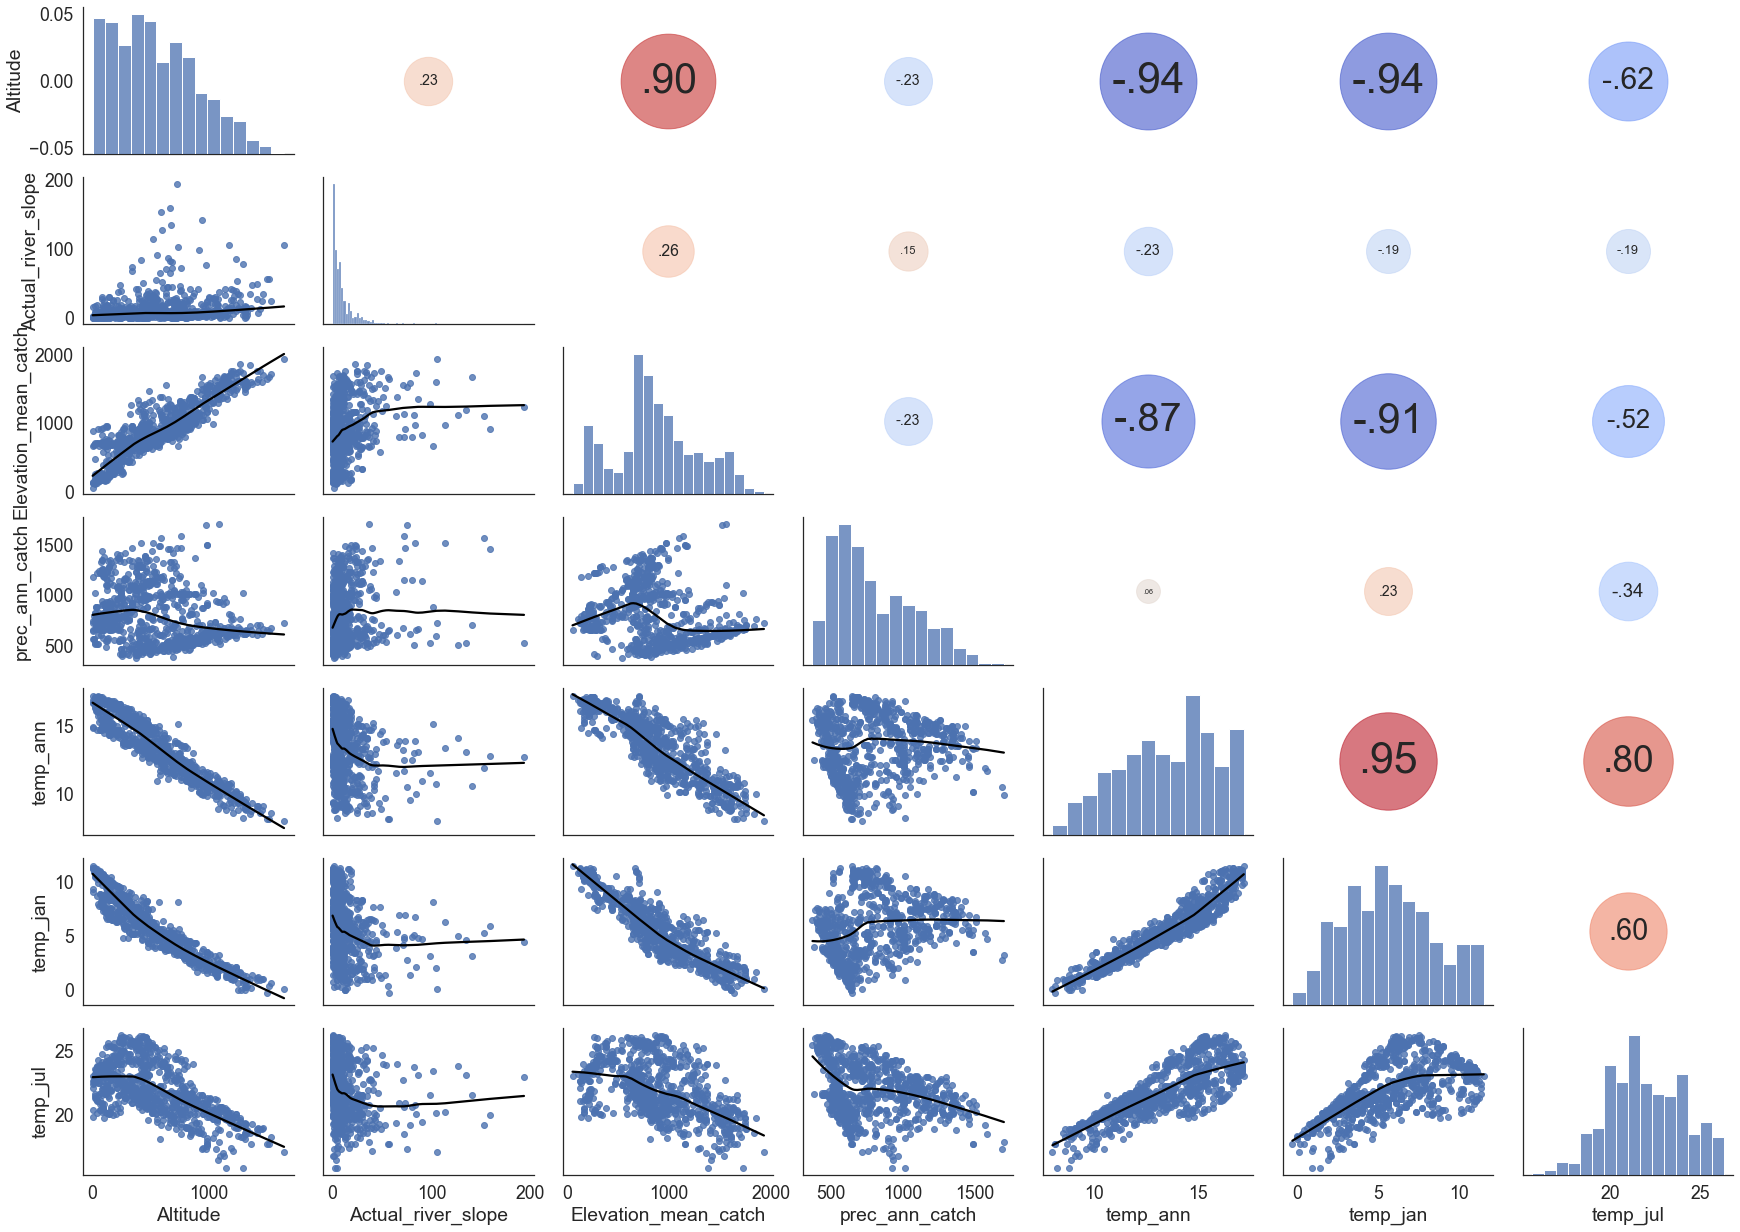

In [3]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(df.iloc[:,1:], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot);

In [18]:
from sklearn.preprocessing import StandardScaler

array_scaled = StandardScaler().fit_transform(df.iloc[:,1:])
df_scaled = pd.DataFrame(data=array_scaled, 
                                columns=df.iloc[:,1:].columns)
df_scaled.head()

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,1.977157,0.083440,1.819874,-0.568930,-1.884845,-1.844771,-1.456903
1,1.703876,-0.126266,1.758331,-0.594745,-1.528436,-1.628612,-1.121913
2,1.478000,-0.189680,1.695256,-0.621683,-1.528436,-1.628612,-1.169769
3,1.321839,-0.003937,1.661725,-0.635268,-1.439333,-1.448480,-0.930491
4,1.213084,-0.478288,1.548328,-0.686126,-1.305680,-1.412454,-0.834779


*Run PCA for 7 variables first:*

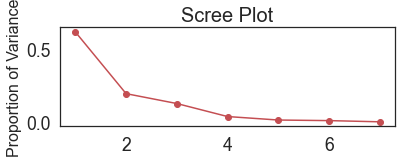

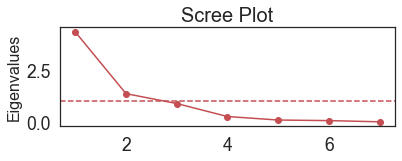

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit_transform(df_scaled)

eigenvalues = pca.explained_variance_ # eigenvalues
prop_var = pca.explained_variance_ratio_ # proportion of explained variance

PC_numbers = np.arange(pca.n_components_) + 1

plt.subplot(2,1,1)
plt.plot(PC_numbers, 
         prop_var,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Proportion of Variance', fontsize=16)
plt.show()

plt.subplot(2,1,2)
plt.plot(PC_numbers, 
         eigenvalues,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Eigenvalues', fontsize=16)
plt.axhline(y=1, color='r', 
            linestyle='--')

plt.show()

*Following Kaiser's rule, we retain only two components.*

In [19]:
pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,4.031481,-0.443316
1,3.461212,-0.629609
2,3.337887,-0.617521
3,3.068276,-0.623461
4,2.787657,-0.844108


Produce a biplot with ‘Catchment_name’ as a grouping variable.


In [20]:
#df_scaled = pd.concat([df.Catchment_name, df_scaled], axis=1)
df_scaled.head()

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,1.977157,0.083440,1.819874,-0.568930,-1.884845,-1.844771,-1.456903
1,1.703876,-0.126266,1.758331,-0.594745,-1.528436,-1.628612,-1.121913
2,1.478000,-0.189680,1.695256,-0.621683,-1.528436,-1.628612,-1.169769
3,1.321839,-0.003937,1.661725,-0.635268,-1.439333,-1.448480,-0.930491
4,1.213084,-0.478288,1.548328,-0.686126,-1.305680,-1.412454,-0.834779


Text(0, 0.5, 'PC2')

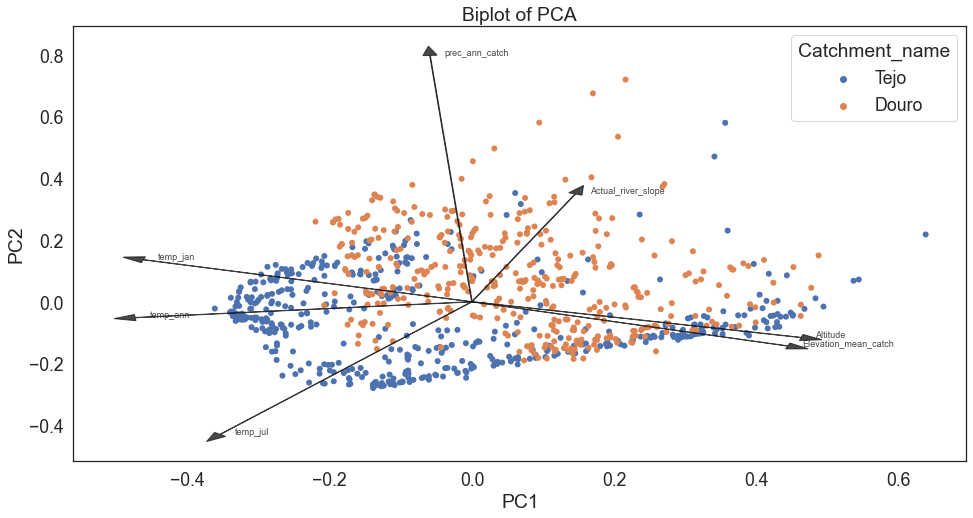

In [8]:
PC1 = df_pca['PC1']/(df_pca['PC1'].max() - df_pca['PC1'].min())
PC2 = df_pca['PC2']/(df_pca['PC2'].max() - df_pca['PC2'].min())

plt.figure(figsize=(16, 8))
plt.title('Biplot of PCA')
sns.scatterplot(x=PC1,
                    y=PC2,
                    hue = df['Catchment_name'].tolist(),
                    linewidth=0)

n = np.transpose(pca.components_).shape[0] # number of dimensions (2)
for i in range(n):
        plt.arrow(0, 0, np.transpose(pca.components_)[i,0], 
                  np.transpose(pca.components_)[i,1], 
                  color = (0.1, 0.1, 0.1, 0.8),
                  head_width=0.02) # plot arrows for each variable
        plt.text(np.transpose(pca.components_)[i,0]+0.02, 
                 np.transpose(pca.components_)[i,1]+0.01, 
                 list(df_scaled.columns)[i], 
                 color = (0.1, 0.1, 0.1, 0.8), 
                 fontsize = 9,
                 ha = 'left', 
                 va = 'center') # variable labels for each arrow
plt.legend(title='Catchment_name')
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
 

## 8.2
 Using the same data, run a MDS and a NMDS and project the sites using the resulting first two axis. Use also the ‘Catchment_name’ as a grouping variable.


### MDS

c:\Users\johan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<AxesSubplot: >

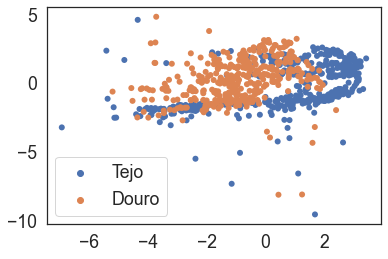

In [9]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

mds = MDS(random_state=0) 
mds_transf = mds.fit_transform(df_scaled)

sns.scatterplot(x=mds_transf[:,0],
              y=mds_transf[:,1],
              hue = df['Catchment_name'].tolist(),
              linewidth=0,
              )

### NMDS

0.3013


<AxesSubplot: >

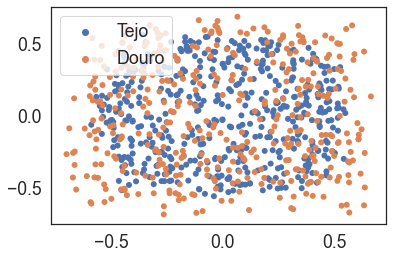

In [10]:
nmds = MDS(n_components=2, random_state=0, metric = False,normalized_stress="auto") # 2 components extracted so that stress is > 0.2
nmds_transf = nmds.fit_transform(df_scaled)

stress = nmds.stress_
print(round(stress,4))

sns.scatterplot(x=nmds_transf[:,0],
              y=nmds_transf[:,1],
              hue = df['Catchment_name'].tolist(),
              linewidth=0,
              )